In [1]:
import feather
import numpy as np
import pandas as pd
import matplotlib.colors
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from datetime import date
from currency_converter import CurrencyConverter

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

%matplotlib inline
%config IPCompleter.use_jedi=False

In [3]:
df_procedimientos = feather.read_dataframe('../data/processed/procedimientos_all_2017_06_28.feather')
print(df_procedimientos.shape)
df_procedimientos = df_procedimientos.loc[df_procedimientos.GOBIERNO == 'APF', :]
df_procedimientos = df_procedimientos.drop('GOBIERNO', axis=1)
df_procedimientos = df_procedimientos.assign(CLAVEUC=df_procedimientos.CLAVEUC_REAL)

df_procedimientos = df_procedimientos.drop('CLAVEUC_REAL', axis=1)
print(df_procedimientos.shape)
cols_id = ['NUMERO_PROCEDIMIENTO', 'CODIGO_CONTRATO', 'CODIGO_EXPEDIENTE']
df_validos = df_procedimientos.drop_duplicates(subset=cols_id, keep='first')
print(df_validos.shape)
df_validos.head(3)

(861169, 46)
(742022, 44)
(741630, 44)


,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS
70,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,MULTISERVICIOS Y ASESORIAS DEL CARIBE SA DE CV,HABILITADO,None,319200.0,NaN,MXN,IA-009JZL032-N1-2012,Mixta,INVITACION A CUANDO MENOS 3 PERSONAS,165782,"SERVICIO DE LIMPIEZA, CZM 2012",None,ADQUISICIONES,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,NaT,2011-12-16 00:00:00,2011-12-19,NaT,2012-01-01,2013-02-28,115807,"SERVICIO DE LIMPIEZA, CZM 2012",Z15122015 04. Invitación a cuando menos tres N...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,319200.0
71,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,ALEJANDRO ALARCON JIMON,HABILITADO,None,26097.0,NaN,MXN,AA-009JZL032-N4-2012,Presencial,ADJUDICACION DIRECTA FEDERAL,165738,MANTENIMIENTO A EXTINTORES CZM,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,2012-08-10 15:59:00,2012-08-10 16:05:00,NaT,2012-08-20,2012-08-26,2012-12-31,242370,"SERVICIO DE MANTENIMIENTO A EXTINTORES, AD CZM...",Z15122015 07. Adjudicación Directa Nacional Ar...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,26097.0
72,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,5578,TRANSPORTE ESPECIALIZADO DE PERSONAL NACIONAL ...,HABILITADO,MEDIANA,361200.0,NaN,MXN,IA-009JZL032-N2-2012,Mixta,INVITACION A CUANDO MENOS 3 PERSONAS,148131,SERVICIO DE TRANSPORTE DE PERSONAL DE LA ESTAC...,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2011-12-09 14:51:00,2011-12-16 14:00:00,2011-12-19,NaT,2012-01-01,2013-02-28,116667,"SERVICIO DE TRANSPORTE DE PERSONAL, CZM 2012",Z15122015 04. Invitación a cuando menos tres N...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,361200.0


In [20]:
nombre_unidades = pd.read_excel(
    '../data/raw/Directorio Unidades Compradoras Gobierno Federal.xls', dtype=str)
nombre_unidades = set(nombre_unidades['Clave UC en CompraNet'].unique())
# nombre_unidades

In [11]:
df_validos.NUMERO_PROCEDIMIENTO.str.len().value_counts(dropna=False)

 22.0    311961
 21.0    309218
 20.0     67903
 23.0     44121
 24.0      8424
NaN           3
Name: NUMERO_PROCEDIMIENTO, dtype: int64

In [24]:
df_validos.loc[(df_validos.NUMERO_PROCEDIMIENTO.isnull()) & (~df_validos.CLAVEUC.isin(nombre_unidades))]

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS


In [30]:
df_test = df_validos.loc[~df_validos.PROVEEDOR_CONTRATISTA.isnull()]
df_test = df_test.loc[df_test.PROVEEDOR_CONTRATISTA.str.contains('CONSTRUCCIONES AOZ SA DE CV')]
list(df_test.PROVEEDOR_CONTRATISTA.unique())

['CONSTRUCCIONES AOZ SA DE CV']

In [20]:
df_test.PROVEEDOR_CONTRATISTA.value_counts(dropna=False)

CONSTRUCCIONES AOZ SA DE CV    41
BIOMEDICA GAOZ                  5
LIC. ADRIANA ARAOZ PONCE        3
ESPERANZA CUEVAS ARAOZ          2
Name: PROVEEDOR_CONTRATISTA, dtype: int64

In [32]:
df_test.loc[df_test.PROVEEDOR_CONTRATISTA == 'CONSTRUCCIONES AOZ SA DE CV'].IMPORTE_PESOS.sum()

51974410.079999991

In [33]:
# df_validos.loc[df_validos.PROVEEDOR_CONTRATISTA.str.contains('AOZ FARMACEUTICA')]

In [8]:
any(df_validos.NUMERO_PROCEDIMIENTO.value_counts(dropna=False).reset_index().index.isnull())

False

In [11]:
df_validos.NUMERO_PROCEDIMIENTO.str.split('-').isnull().value_counts() #.map(lambda x: x[1])

False    741627
True          3
Name: NUMERO_PROCEDIMIENTO, dtype: int64

In [12]:
df_validos.loc[df_validos.NUMERO_PROCEDIMIENTO.isnull()]

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS
87911,COMISION FEDERAL DE ELECTRICIDAD,CFE,CFE-JEFATURA DEL AREA REGIONAL NOROESTE #018TO...,018TOQ046,ANTONIO ALVAREZ VALDEZ ALVAREZ VALDEZ,None,9419,JIRA INDUSTRIAL,HABILITADO,MEDIANA,81000.0,NaN,MXN,None,None,None,5120,GABINETE PARA EQUIPO DE COMUNICACIONES,None,ADQUISICIONES,EXPIRADO,NaN,NaN,None,NaN,0.0,2011-02-24 17:04:00,2011-02-28 11:00:00,NaT,NaT,2012-03-07,2012-04-07,6907,GABINETE PARA EQUIPO DE COMUNICACIONES,Z15122015 07. Adjudicación Directa Nacional Ar...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,81000.0
683329,INSTITUTO NACIONAL DE ENFERMEDADES RESPIRATORI...,INER,INER-DEPTO. DE MANTO. CONSERV. Y CONSTRUCCION ...,012NCD002,LUIS MOISES CARRANZA MARTINEZ,MICRO,nan,SERO SOLUCIONES EMPRESARIALES SA DE CV,HABILITADO,PEQUENA,296917.0,NaN,MXN,None,None,ADJUDICACION DIRECTA FEDERAL,1066989,.,None,SERVICIOS,EXPIRADO,0.0,0.0,None,NaN,0.0,NaT,NaT,NaT,NaT,2016-04-15,2016-12-31,1054800,.,None,None,PoC,None,No,MX,NaN,None,NaN,296917.0
694299,SERVICIO POSTAL MEXICANO,SEPOMEX,SEPOMEX-SUBDIRECCION DE RECURSOS MATERIALES #0...,009J9E001,GABRIELA CALZADA SANTANA,MEDIANA,105293,ESTUDIOS CHURUBUSCO AZTECA SA,HABILITADO,MEDIANA,2915022.5,NaN,MXN,None,Mixta,ADJUDICACION DIRECTA FEDERAL,1214834,"DESSARROLLO DE CREATIVIDAD, PRODUCCION Y POST ...",None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,NaN,0.0,NaT,NaT,NaT,NaT,2016-08-31,2016-12-31,1178261,"DESSARROLLO DE CREATIVIDAD, PRODUCCION Y POST ...",None,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,2915022.5


In [7]:
# df_tiempo = df_validos.loc[:, ['CLAVEUC', 'IMPORTE_PESOS', 'FECHA_INICIO']].set_index('FECHA_INICIO')

# df_tiempo = df_tiempo.groupby(
#     'CLAVEUC'
# ).resample('M').IMPORTE_PESOS.sum().reset_index().sort_values('FECHA_INICIO').set_index('FECHA_INICIO')

# df_tiempo = df_tiempo.pivot(columns='CLAVEUC', values='IMPORTE_PESOS')
# ucs = list(df_tiempo.sum(axis=0).nlargest(9).index.values)
# ucs = ucs[5:]
# with plt.style.context('seaborn-talk'):
#     fig, ax = plt.subplots(nrows=1, ncols=1)
#     df_tiempo.loc[:, ucs].plot(ax=ax)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [3]:
df_validos.head()

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS
70,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,MULTISERVICIOS Y ASESORIAS DEL CARIBE SA DE CV,HABILITADO,None,319200.0,NaN,MXN,IA-009JZL032-N1-2012,Mixta,INVITACION A CUANDO MENOS 3 PERSONAS,165782,"SERVICIO DE LIMPIEZA, CZM 2012",None,ADQUISICIONES,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,NaT,2011-12-16 00:00:00,2011-12-19,NaT,2012-01-01,2013-02-28,115807,"SERVICIO DE LIMPIEZA, CZM 2012",Z15122015 04. Invitación a cuando menos tres N...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,319200.0
71,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,ALEJANDRO ALARCON JIMON,HABILITADO,None,26097.0,NaN,MXN,AA-009JZL032-N4-2012,Presencial,ADJUDICACION DIRECTA FEDERAL,165738,MANTENIMIENTO A EXTINTORES CZM,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,2012-08-10 15:59:00,2012-08-10 16:05:00,NaT,2012-08-20,2012-08-26,2012-12-31,242370,"SERVICIO DE MANTENIMIENTO A EXTINTORES, AD CZM...",Z15122015 07. Adjudicación Directa Nacional Ar...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,26097.0
72,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,5578,TRANSPORTE ESPECIALIZADO DE PERSONAL NACIONAL ...,HABILITADO,MEDIANA,361200.0,NaN,MXN,IA-009JZL032-N2-2012,Mixta,INVITACION A CUANDO MENOS 3 PERSONAS,148131,SERVICIO DE TRANSPORTE DE PERSONAL DE LA ESTAC...,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2011-12-09 14:51:00,2011-12-16 14:00:00,2011-12-19,NaT,2012-01-01,2013-02-28,116667,"SERVICIO DE TRANSPORTE DE PERSONAL, CZM 2012",Z15122015 04. Invitación a cuando menos tres N...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,361200.0
73,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,COMERCIALIZADORA EL MAHARAJA SA DE CV,HABILITADO,None,334264.0,NaN,MXN,AA-009JZL032-N5-2011,Mixta,ADJUDICACION DIRECTA FEDERAL,276283,SERVICIO DE COMEDOR DEL PERSONAL DE LA ESTACIO...,None,ADQUISICIONES,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2011-12-28 12:45:00,2011-12-28 17:00:00,NaT,NaT,2012-01-01,2013-02-28,123933,SERVICIO DE COMEDOR AD CZM 2012,Z15122015 07. Adjudicación Directa Nacional Ar...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,334264.0
74,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MEDIANA,nan,COMERCIALIZADORA EL MAHARAJA SA DE CV,HABILITADO,None,285948.0,NaN,MXN,AA-009JZL032-N5-2011,Mixta,ADJUDICACION DIRECTA FEDERAL,148083,SERVICIO DE COMEDOR PARA EL PERSONAL DE LA EST...,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,NaN,0.0,2011-12-28 12:45:00,2011-12-28 17:00:00,NaT,2011-12-30,2012-01-01,2012-12-31,123933,SERVICIO DE COMEDOR AD CZM 2012,Z15122015 07. Adjudicación Directa Nacional Ar...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,285948.0


In [ ]:
['006E00001', '019GYN005', '020VSS998', '009000963', '018TOQ755'] + ['019GYR046', '019GYR035', '011L6J001', '008JAG001']

In [21]:
df_validos.loc[df_validos.NUMERO_PROCEDIMIENTO == 'IA-006E00001-T123-2012']

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS,delta_dias
30093,SERVICIO DE ADMINISTRACION TRIBUTARIA,SAT,SAT-ADMINISTRACION GENERAL DE RECURSOS Y SERVI...,006E00001,LUIS ALBERTO NUNEZ BORRULL,MICRO,96470,FIDEL PALLARES ORTEGA,HABILITADO,MICRO,362393.0,NaN,MXN,IA-006E00001-T123-2012,Mixta,INVITACION A CUANDO MENOS 3 PERSONAS,270277,ADQUISICION DE ESTANDARES PARA EL LABORATORIO ...,None,ADQUISICIONES,EXPIRADO,0.0,1.0,Internacional,0.0,0.0,2012-11-07 17:30:00,2012-11-21 11:00:00,2012-11-21,2012-12-18,2012-12-18,2013-03-03,276079,ADQUISICION DE ESTANDARES PARA EL LABORATORIO ...,Z15122015 05. Invitación a cuando menos tres I...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,362393.0,75
30094,SERVICIO DE ADMINISTRACION TRIBUTARIA,SAT,SAT-ADMINISTRACION GENERAL DE RECURSOS Y SERVI...,006E00001,LUIS ALBERTO NUNEZ BORRULL,MICRO,nan,ANALYTICAL CONTROL,HABILITADO,MICRO,166535.0,NaN,MXN,IA-006E00001-T123-2012,Mixta,INVITACION A CUANDO MENOS 3 PERSONAS,270276,ADQUISICION DE ESTANDARES PARA EL LABORATORIO ...,None,ADQUISICIONES,EXPIRADO,0.0,1.0,Internacional,0.0,0.0,2012-11-07 17:30:00,2012-11-21 11:00:00,2012-11-21,2012-12-18,2012-12-18,2013-03-03,276079,ADQUISICION DE ESTANDARES PARA EL LABORATORIO ...,Z15122015 05. Invitación a cuando menos tres I...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,166535.0,75


# Ultimos

In [3]:
df_validos = df_validos.assign(
    delta_dias=(df_validos.FECHA_FIN - df_validos.FECHA_INICIO).dt.days,
    MES_INICIO=(df_validos.FECHA_INICIO.dt.month),
    MES_FIN=(df_validos.FECHA_FIN.dt.month),
)

df_time = df_validos.loc[df_validos.delta_dias <= 365]

In [4]:
df_conteo = df_time.loc[
    (df_time.MES_INICIO == 11) &
    (df_time.MES_FIN == 12)].groupby('DEPENDENCIA').NUMERO_PROCEDIMIENTO.count()
df_conteo = df_conteo.sort_values(ascending=False)

df_monto = df_time.loc[
    (df_time.MES_INICIO == 11) &
    (df_time.MES_FIN == 12)].groupby('DEPENDENCIA').IMPORTE_PESOS.sum()
df_monto = df_monto.sort_values(ascending=False)

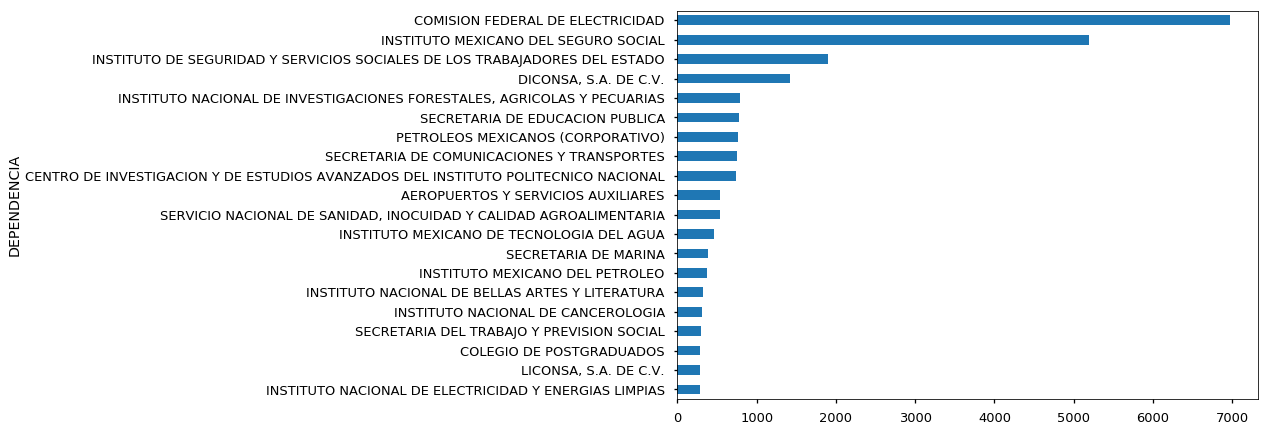

In [6]:
with plt.style.context('seaborn-talk'):
    df_conteo.head(20).sort_values().plot.barh()

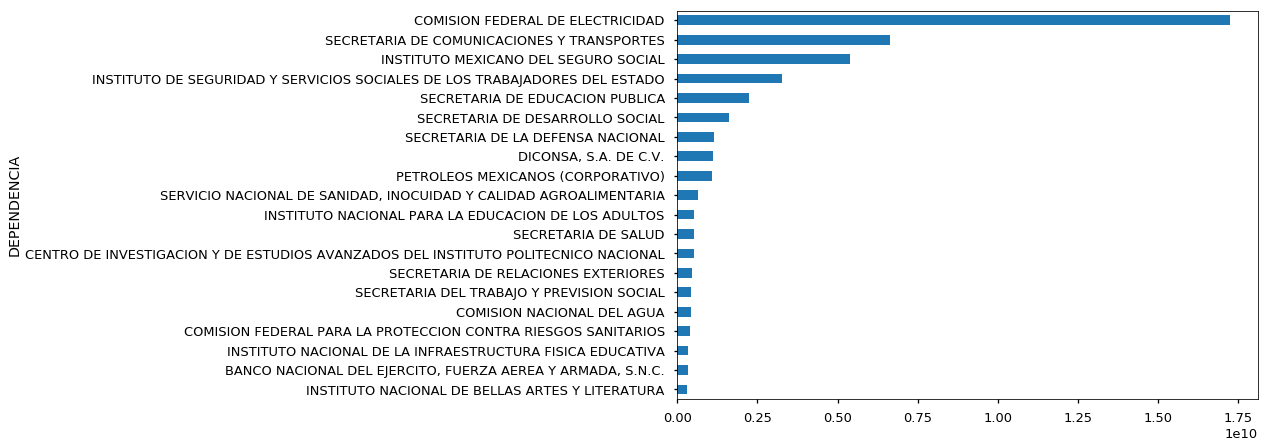

In [7]:
with plt.style.context('seaborn-talk'):
    df_monto.head(20).sort_values().plot.barh()

In [5]:
df_conteo

DEPENDENCIA
COMISION FEDERAL DE ELECTRICIDAD                                                           6975
INSTITUTO MEXICANO DEL SEGURO SOCIAL                                                       5199
INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADORES DEL ESTADO                 1904
DICONSA, S.A. DE C.V.                                                                      1416
INSTITUTO NACIONAL DE INVESTIGACIONES FORESTALES, AGRICOLAS Y PECUARIAS                     788
SECRETARIA DE EDUCACION PUBLICA                                                             779
PETROLEOS MEXICANOS (CORPORATIVO)                                                           769
SECRETARIA DE COMUNICACIONES Y TRANSPORTES                                                  750
CENTRO DE INVESTIGACION Y DE ESTUDIOS AVANZADOS DEL INSTITUTO POLITECNICO NACIONAL          744
AEROPUERTOS Y SERVICIOS AUXILIARES                                                          540
SERVICIO NACIONAL DE SANIDAD

## Heatmap

In [3]:
meses = ["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"]
meses = {i: m for i, m in enumerate(meses, 1)}

In [4]:
df_validos = df_validos.assign(
    delta_dias=(df_validos.FECHA_FIN - df_validos.FECHA_INICIO).dt.days,
    MES_INICIO=(df_validos.FECHA_INICIO.dt.month),
    MES_FIN=(df_validos.FECHA_FIN.dt.month),
)

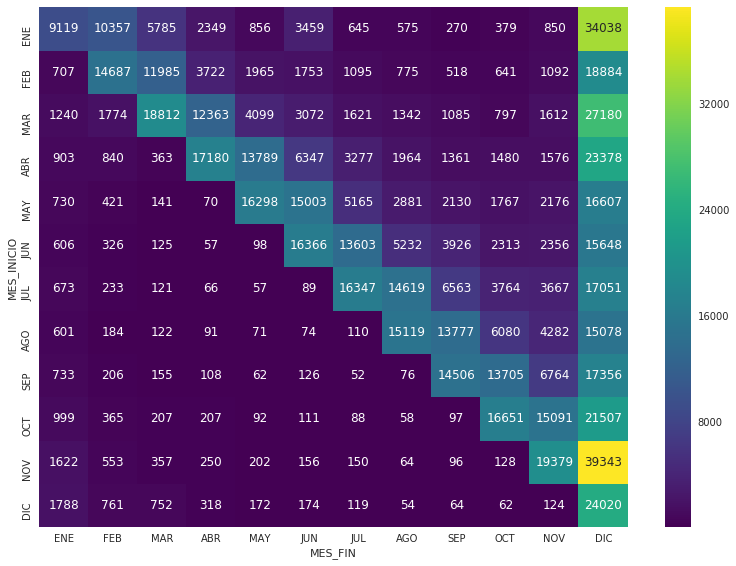

In [5]:
df_time = df_validos.loc[df_validos.delta_dias <= 365]
df_time = df_time.groupby(['MES_INICIO', 'MES_FIN'], as_index=False).NUMERO_PROCEDIMIENTO.count()
df_time = df_time.pivot(index='MES_INICIO', columns='MES_FIN', values='NUMERO_PROCEDIMIENTO')
df_time = df_time.rename(columns={col: meses[col] for col in df_time.columns})
df_time = df_time.assign(MES_INICIO=meses.values())
df_time = df_time.set_index('MES_INICIO')
with plt.style.context('seaborn-talk'):
    import seaborn as sns
    vmin = df_time.values.min()
    vmax = df_time.values.max()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 8))
    sns.heatmap(df_time, cmap='viridis', annot=True, fmt='d', vmin=vmin, vmax=vmax)
    plt.tight_layout()

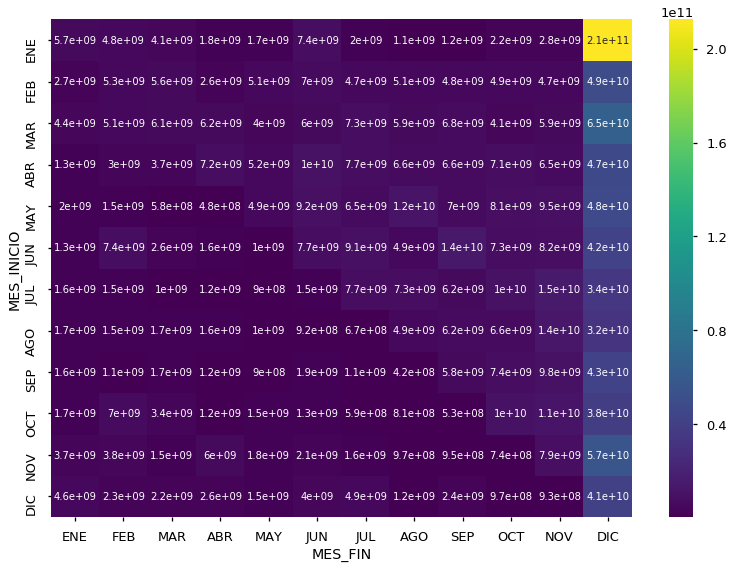

In [7]:
df_time = df_validos.loc[df_validos.delta_dias <= 365]
df_time = df_time.groupby(['MES_INICIO', 'MES_FIN'], as_index=False).IMPORTE_PESOS.sum()
df_time = df_time.pivot(index='MES_INICIO', columns='MES_FIN', values='IMPORTE_PESOS')
df_time = df_time.rename(columns={col: meses[col] for col in df_time.columns})
df_time = df_time.assign(MES_INICIO=meses.values())
df_time = df_time.set_index('MES_INICIO')
with plt.style.context('seaborn-talk'):
    import seaborn as sns
    vmin = df_time.values.min()
    vmax = df_time.values.max()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 8))
    sns.heatmap(df_time, cmap='viridis', annot=True, vmin=vmin, vmax=vmax)
    plt.tight_layout()

In [39]:
# df_validos.loc[(df_validos.delta_dias <= 365) & (df_validos.MES_INICIO == 12) & (df_validos.MES_FIN == 1)]

In [37]:
df_validos.delta_dias.nlargest(10)

831345    30315
832083    30315
486564    11008
700902     9375
361216     9168
137467     8252
690302     7304
700861     5671
700753     5491
700796     5491
Name: delta_dias, dtype: int64

In [25]:
meses = ["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"]
meses = {i: m for i, m in enumerate(meses, 1)}

df_validos = df_validos.assign(
    # DIA_INICIO=df_validos.FECHA_INICIO.dt.dayofyear,
    # DIA_FIN=df_validos.FECHA_FIN.dt.dayofyear,
    DIA_INICIO=(
        df_validos.FECHA_INICIO.dt.month.map(meses) + '-' + df_validos.FECHA_INICIO.dt.day.astype(str).str.pad(2, fillchar='0')
    ),
    DIA_FIN=(
        df_validos.FECHA_FIN.dt.month.map(meses) + '-' + df_validos.FECHA_FIN.dt.day.astype(str).str.pad(2, fillchar='0')
    )
)



In [33]:
df_validos.loc[df_validos.delta_dias < 366].shape

(716878, 47)

In [32]:
df_times = df_validos.loc[
    df_validos.delta_dias < 366
].groupby(['dia_inicio', 'dia_fin'], as_index=False).NUMERO_PROCEDIMIENTO.count()
df_times

,dia_inicio,dia_fin,NUMERO_PROCEDIMIENTO
0,ABR-01,ABR-01,71
1,ABR-01,ABR-02,33
2,ABR-01,ABR-03,20
3,ABR-01,ABR-04,41
4,ABR-01,ABR-05,33
5,ABR-01,ABR-06,37
6,ABR-01,ABR-07,36
7,ABR-01,ABR-08,69
8,ABR-01,ABR-09,19
9,ABR-01,ABR-10,68


In [36]:
df_times.sort_values('NUMERO_PROCEDIMIENTO', ascending=False)

,dia_inicio,dia_fin,NUMERO_PROCEDIMIENTO
12220,ENE-01,DIC-31,19863
30812,MAR-01,DIC-31,8405
81,ABR-01,DIC-31,6170
16110,FEB-01,DIC-31,3099
12413,ENE-02,DIC-31,2494
20813,JUL-01,DIC-31,1784
51968,SEP-30,DIC-31,1696
12333,ENE-01,MAR-31,1536
41928,NOV-01,DIC-31,1462
30614,JUN-30,DIC-31,1390


In [40]:
# df_validos.delta_dias.value_counts(dropna=False)

In [20]:
df_validos = df_validos.assign(
    periodo_inicio=(df_validos.FECHA_INICIO.dt.month.map(meses) + '-' + df_validos.FECHA_INICIO.dt.day.astype(str).str.pad(2, fillchar='0'))
)

(741630, 45)

In [7]:
df_validos.sort_values('delta_dias', ascending=False).delta_dias.describe()

count    741630.000000
mean        121.732306
std         177.105357
min           0.000000
25%          13.000000
50%          52.000000
75%         184.000000
max       30315.000000
Name: delta_dias, dtype: float64

In [19]:
df_validos.loc[df_validos.delta_dias > 365] #.PLURIANUAL.value_counts(dropna=False)# .sort_values('IMPORTE_PESOS', ascending=False)

 0.0    16189
 1.0     8562
NaN         1
Name: PLURIANUAL, dtype: int64

In [6]:
# nombre_unidades = pd.read_excel(
#     '../data/raw/Directorio Unidades Compradoras Gobierno Federal.xls', dtype=str)
# nombre_unidades

In [ ]:
df_validos = df_validos.assign(Year=df_validos.FECHA_INICIO.dt.year)

In [4]:
unidades_all = set(df_validos.CLAVEUC.unique())

df_validos_13 = df_validos.loc[df_validos.Year == 2013]
unidades_2013 = set(df_validos_13.CLAVEUC.unique())

unidades_missing = unidades_all - unidades_2013

In [58]:
# df_unidades = df_validos.groupby(
#     'CLAVEUC').IMPORTE_PESOS.sum().sort_values(ascending=False).reset_index()

df_unidades = df_validos.groupby(
    'CLAVEUC').NUMERO_PROCEDIMIENTO.count().sort_values(ascending=False).reset_index()

nombre_unidades = pd.read_excel(
    '../data/raw/Directorio Unidades Compradoras Gobierno Federal.xls', dtype=str)
nombre_unidades = nombre_unidades.loc[
    nombre_unidades['Clave UC en CompraNet'].isin(df_unidades.CLAVEUC.unique()),
    ['Clave UC en CompraNet', 'Nombre UC en CompraNet']
]

nombre_unidades = nombre_unidades.rename(
    columns={'Clave UC en CompraNet': 'CLAVEUC', 'Nombre UC en CompraNet': 'NOMBRE_UC'})

pd.merge(
    df_unidades.loc[df_unidades.CLAVEUC.isin(unidades_missing)], nombre_unidades, on='CLAVEUC', how='inner'
).sort_values('NUMERO_PROCEDIMIENTO', ascending=False).head(100)

,CLAVEUC,NUMERO_PROCEDIMIENTO,NOMBRE_UC
0,020VSS998,31546,DICONSA-Dirección de Comercialización #020VSS998
1,006A00997,6057,INDAABIN-Dirección General de Administración y...
2,0389ZY998,2065,CIAD-Centro de Investigación en Alimentación y...
3,019GYR046,2021,IMSS-Hospital de Especialidades del CMN Manuel...
4,019GYR035,1330,IMSS-COORD DE ABAST Y EQ DELEG NUEVO LEON #019...
5,019GYR043,1215,IMSS-UMAE HOSPITAL GENERAL DR GAUDENCIO GONZAL...
6,011L6J001,1173,CONALITEG-DIRECCIÓN DE RECURSOS MATERIALES Y S...
7,012NCA001,1156,INCARD-Subdirección de Recursos Materiales #01...
8,008JAG001,1125,INIFAP-Dirección de Administración del Centro ...
9,019GYN005,929,ISSSTE-Departamento de Control de Servicios Op...


In [64]:
df_tiempo = df_validos.loc[
    df_validos.CLAVEUC.isin(
        ['006E00001', '019GYN005', '020VSS998', '009000963', '018TOQ755'] + ['019GYR046', '019GYR035', '011L6J001', '008JAG001']
    )
].set_index('FECHA_INICIO')

df_tiempo = df_tiempo.groupby(
    'CLAVEUC'
).resample('M').IMPORTE_PESOS.sum().reset_index().sort_values('FECHA_INICIO').set_index('FECHA_INICIO')

df_tiempo = df_tiempo.pivot(columns='CLAVEUC', values='IMPORTE_PESOS')

df_tiempo

CLAVEUC,006E00001,008JAG001,009000963,011L6J001,018TOQ755,019GYN005,019GYR035,019GYR046,020VSS998
FECHA_INICIO,,,,,,,,,
2012-01-31,8.415556e+08,NaN,1.720069e+06,1.486416e+06,NaN,2.984370e+08,5.548000e+06,4.000000e+05,1.143675e+08
2012-02-29,8.594737e+08,52236.56,5.496208e+08,1.532965e+06,NaN,1.139669e+06,3.776311e+07,NaN,8.198720e+07
2012-03-31,4.348368e+06,264969.75,6.934573e+07,3.272992e+06,NaN,3.049197e+08,3.148537e+07,NaN,1.010640e+09
2012-04-30,6.138000e+05,266865.42,1.392539e+08,1.102141e+06,NaN,1.257585e+08,2.108430e+07,NaN,7.120742e+07
2012-05-31,6.896249e+08,434290.91,4.594859e+08,1.368000e+06,NaN,2.340673e+08,9.611183e+06,NaN,8.295457e+08
2012-06-30,2.530864e+08,1065297.81,9.894555e+07,2.478969e+06,2.999390e+04,8.345132e+08,2.288203e+06,NaN,7.219516e+08
2012-07-31,5.195506e+08,1847311.08,1.963567e+08,3.264866e+06,NaN,6.129596e+07,4.632551e+06,NaN,2.705291e+07
2012-08-31,9.777257e+08,253873.74,2.184804e+08,NaN,7.893593e+05,1.280571e+07,7.738106e+06,NaN,3.591574e+08
2012-09-30,8.075513e+08,430697.09,5.348717e+08,NaN,NaN,2.663319e+08,9.311424e+06,NaN,7.879467e+07


In [ ]:
df_tiempo = df_validos.loc[
    df_validos.CLAVEUC.isin(
        ['006E00001', '019GYN005', '020VSS998', '009000963', '018TOQ755'] + ['019GYR046', '019GYR035', '011L6J001', '008JAG001']
    )
].set_index('FECHA_INICIO')

df_tiempo = df_tiempo.groupby(
    'CLAVEUC'
).resample('M').IMPORTE_PESOS.sum().reset_index().sort_values('FECHA_INICIO').set_index('FECHA_INICIO')

df_tiempo = df_tiempo.pivot(columns='CLAVEUC', values='IMPORTE_PESOS')

df_tiempo

In [23]:
proceds_in_13 = [
    'SA-019GYN005-N167-2012', 'SA-019GYN005-N178-2012',
    'LA-019GYN005-N84-2011', 'SA-019GYN005-N171-2012',
    'AA-006E00001-N105-2012', 'SA-006E00001-N85-2012',
    'SA-006E00001-T133-2012', 'LA-006E00001-N48-2012',
    'SA-006E00001-T113-2012', 'IA-006E00001-T123-2012',
    'IA-006E00001-T123-2012', 'SA-006E00001-T120-2012',
    'SA-006E00001-T132-2012', 'LA-006E00001-I38-2012',
    'LA-006E00001-N98-2012', 'SA-006E00001-N130-2012',
    'AA-006E00001-N97-2012', 'SA-006E00001-N136-2012',
    'LO-018TOQ755-N6-2012', 'LO-018TOQ755-N5-2012',
    'AO-018TOQ755-N13-2012', 'AO-018TOQ755-N12-2012',
    'LO-018TOQ755-N9-2012', 'LO-018TOQ755-N8-2012',
    'LO-018TOQ755-N7-2012', 'AA-020VSS998-E1205-2012',
    'AA-020VSS998-E1210-2012', 'AA-020VSS998-E1213-2012',
    'AA-020VSS998-E1212-2012', 'AA-020VSS998-E1184-2012',
    'AA-020VSS998-E1207-2012', 'AA-020VSS998-E1183-2012',
    'AA-020VSS998-E1215-2012', 'AA-020VSS998-E1182-2012',
    'AA-020VSS998-E1208-2012', 'AA-020VSS998-E1211-2012',
    'AA-020VSS998-E1204-2012', 'AA-020VSS998-E1202-2012',
    'AA-020VSS998-E1178-2012', 'AA-020VSS998-E1181-2012',
    'AA-020VSS998-E1214-2012', 'AA-020VSS998-E1209-2012',
    'AA-020VSS998-E1325-2013', 'AA-020VSS998-E1206-2012',
    'AA-020VSS998-E1318-2013', 'AA-020VSS998-E1203-2012',
    'AA-020VSS998-E1216-2012', 'AA-020VSS998-E1185-2012',
    'LO-009000963-N174-2011', 'IO-009000963-N85-2012'
]
len(proceds_in_13)
len(set(proceds_in_13))

49

In [45]:
df_validos_13.loc[df_validos.CLAVEUC == '018TOQ036']

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS,Year


In [46]:
df_validos.loc[df_validos.CLAVEUC == '018TOQ036'].Year.value_counts()

2014    71
2015    59
2016    43
2012    20
Name: Year, dtype: int64

In [4]:
# df_unidades.loc[df_unidades.CLAVEUC.isin(unidades_missing)]

In [22]:
n_top = 20

df_unidades = df_validos.groupby(
    'CLAVEUC').IMPORTE_PESOS.sum().sort_values(ascending=False).reset_index()

df_unidades = df_unidades.head(n_top)

nombre_unidades = pd.read_excel(
    '../data/raw/Directorio Unidades Compradoras Gobierno Federal.xls', dtype=str)
nombre_unidades = nombre_unidades.loc[
    nombre_unidades['Clave UC en CompraNet'].isin(df_unidades.CLAVEUC.unique()),
    ['Clave UC en CompraNet', 'Nombre UC en CompraNet']
]
nombre_unidades = nombre_unidades.rename(
    columns={'Clave UC en CompraNet': 'CLAVEUC', 'Nombre UC en CompraNet': 'NOMBRE_UC'})

df_unidades = pd.merge(df_unidades, nombre_unidades, how='inner', on='CLAVEUC')
df_unidades

,CLAVEUC,IMPORTE_PESOS,NOMBRE_UC
0,019GYR047,1.683157e+11,IMSS-DIVISION BIENES TERAPEUTICOS #019GYR047
1,018TOQ054,9.426704e+10,CFE-Subdirección de Contratación de Proyectos ...
2,018TOQ003,7.745745e+10,CFE-Gerencia de Abastecimientos #018TOQ003
3,019GYN007,5.115702e+10,ISSSTE-Jefatura de Servicios de Adquisición de...
4,009000999,4.908362e+10,SCT-Direccion General de Carreteras #009000999
5,009000988,4.523970e+10,SCT-Direccion General de Transporte Ferroviari...
6,006E00001,4.102517e+10,SAT-Administración General de Recursos y Servi...
7,019GYN005,3.331981e+10,ISSSTE-Departamento de Control de Servicios Op...
8,009KDH999,3.287854e+10,GACM-DIirección Corporativa de Administración ...
9,018T4I006,3.042546e+10,PEMEX-PETRÓLEOS MEXICANOS #018T4I006


In [29]:
df_validos_13_top = df_validos_13.loc[df_validos_13.CLAVEUC.isin(df_unidades.head(1).CLAVEUC)]

In [44]:
unidades_no_2013 = set(df_validos.CLAVEUC.unique()) - set(df_validos_13.CLAVEUC.unique())

In [45]:
len(unidades_no_2013)

342

## Serie de tiempo y agregados por monto

In [41]:
df_validos_13.loc[df_validos_13.CLAVEUC == '006E00001']

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS,Year


## Inicio de proc en ultimos días del año


In [6]:
# df_validos.columns
# df_salida = df_validos.loc[:, 
#     ['PROC_F_PUBLICACION', 'FECHA_APERTURA_PROPOSICIONES', 'EXP_F_FALLO',
#      'FECHA_CELEBRACION', 'FECHA_INICIO', 'FECHA_FIN']]

meses = ["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"]
meses = {i: m for i, m in enumerate(meses, 1)}

In [7]:
df_validos = df_validos.assign(
    # DIA_INICIO=df_validos.FECHA_INICIO.dt.dayofyear,
    # DIA_FIN=df_validos.FECHA_FIN.dt.dayofyear,
    periodo_inicio=(
        df_validos.FECHA_INICIO.dt.month.map(meses) + '-' + df_validos.FECHA_INICIO.dt.day.astype(str).str.pad(2, fillchar='0')
    )
)


In [8]:
num_procs_periodo = df_validos.loc[
    (df_validos.FECHA_FIN.dt.month == 12) # & (df_validos.FECHA_FIN.dt.day >= 20)
].groupby('periodo_inicio', as_index=False).NUMERO_PROCEDIMIENTO.count()

monto_procs_periodo = df_validos.loc[
    (df_validos.FECHA_FIN.dt.month == 12) # & (df_validos.FECHA_FIN.dt.day >= 20)
].groupby('periodo_inicio', as_index=False).IMPORTE_PESOS.sum()

print(num_procs_periodo.shape, monto_procs_periodo.shape)
df_total = pd.merge(num_procs_periodo, monto_procs_periodo, on='periodo_inicio', how='inner')
print(df_total.shape)
df_total = df_total.set_index('periodo_inicio')

(366, 2) (366, 2)
(366, 3)


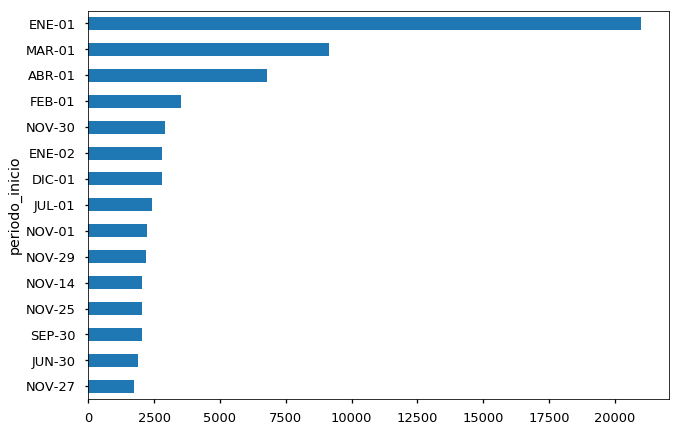

In [10]:
with plt.style.context('seaborn-talk'):
    df_total.sort_values('NUMERO_PROCEDIMIENTO', ascending=False).NUMERO_PROCEDIMIENTO.head(15).sort_values().plot.barh()

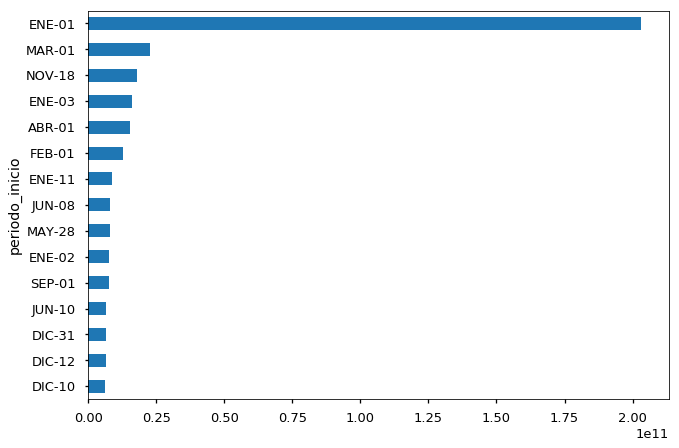

In [9]:
with plt.style.context('seaborn-talk'):
    df_total.sort_values('IMPORTE_PESOS', ascending=False).IMPORTE_PESOS.head(15).sort_values().plot.barh()

In [11]:
df_validos.describe

1

# Hacer delta dias para estos valores filtrados y ver cuál es la frecuencia 

In [3]:
df_validos.loc[df_validos.NUMERO_PROCEDIMIENTO == 'LA-016F00002-N1-2012']

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS
29250,COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS,CONANP,CONANP-UNIDAD ADMINISTRATIVA REGIONAL #016F00002,016F00002,HERIBERTO MARTINEZ LOPEZ,PEQUENA,nan,MARIO ERNESTO MONTALVO HERNANDEZ,HABILITADO,MICRO,66000.00,1331789.2,MXN,LA-016F00002-N1-2012,Mixta,LICITACION PUBLICA,96337,SERVICIO DE VIGILANCIA Y/O LIMPIEZA DE INMUEBLES,None,SERVICIOS,EXPIRADO,1.0,0.0,Nacional,0.0,1.0,2012-02-10 12:45:00,2012-02-23 11:00:00,2012-02-25,NaT,2012-03-01,2013-02-28,127352,SERVICIOS DE VIGILANCIA Y/O LIMPIEZA DE INMUEB...,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,16.0,None,NaN,66000.00
29251,COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS,CONANP,CONANP-UNIDAD ADMINISTRATIVA REGIONAL #016F00002,016F00002,HERIBERTO MARTINEZ LOPEZ,PEQUENA,nan,MARIO ERNESTO MONTALVO HERNANDEZ,HABILITADO,MICRO,66000.00,1331789.2,MXN,LA-016F00002-N1-2012,Mixta,LICITACION PUBLICA,96336,SERVICIO DE VIGILANCIA Y/O LIMPIEZA DE INMUEBLES,None,SERVICIOS,EXPIRADO,1.0,0.0,Nacional,0.0,1.0,2012-02-10 12:45:00,2012-02-23 11:00:00,2012-02-25,2012-02-29,2012-03-01,2013-02-28,127352,SERVICIOS DE VIGILANCIA Y/O LIMPIEZA DE INMUEB...,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,16.0,None,NaN,66000.00
29252,COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS,CONANP,CONANP-UNIDAD ADMINISTRATIVA REGIONAL #016F00002,016F00002,HERIBERTO MARTINEZ LOPEZ,PEQUENA,7750,"CORPORATIVO DIAMANTE DEL SURESTE, S.A. DE C.V.",HABILITADO,MEDIANA,52700.00,1331789.2,MXN,LA-016F00002-N1-2012,Mixta,LICITACION PUBLICA,96316,SERVICIO DE VIGILANCIA Y/O LIMPIEZA DE INMUEBLES,None,SERVICIOS,EXPIRADO,1.0,0.0,Nacional,0.0,0.0,2012-02-10 12:45:00,2012-02-23 11:00:00,2012-02-25,2012-02-29,2012-03-01,2012-12-31,127352,SERVICIOS DE VIGILANCIA Y/O LIMPIEZA DE INMUEB...,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,16.0,None,NaN,52700.00
29253,COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS,CONANP,CONANP-UNIDAD ADMINISTRATIVA REGIONAL #016F00002,016F00002,HERIBERTO MARTINEZ LOPEZ,PEQUENA,7750,"CORPORATIVO DIAMANTE DEL SURESTE, S.A. DE C.V.",HABILITADO,MEDIANA,61440.00,1331789.2,MXN,LA-016F00002-N1-2012,Mixta,LICITACION PUBLICA,96284,SERVICIO DE VIGILANCIA Y/O LIMPIEZA DE INMUEBLES,None,SERVICIOS,EXPIRADO,1.0,0.0,Nacional,0.0,1.0,2012-02-10 12:45:00,2012-02-23 11:00:00,2012-02-25,2012-02-29,2012-03-01,2013-02-28,127352,SERVICIOS DE VIGILANCIA Y/O LIMPIEZA DE INMUEB...,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,16.0,None,NaN,61440.00
29254,COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS,CONANP,CONANP-UNIDAD ADMINISTRATIVA REGIONAL #016F00002,016F00002,HERIBERTO MARTINEZ LOPEZ,MEDIANA,nan,SERVICIOS DE VIGILANCIA PRIVADA Y LIMPIEZA DEL...,HABILITADO,MEDIANA,137880.00,1331789.2,MXN,LA-016F00002-N1-2012,Mixta,LICITACION PUBLICA,96278,SERVICIO DE VIGILANCIA Y/O LIMPIEZA DE INMUEBLES,None,SERVICIOS,EXPIRADO,1.0,0.0,Nacional,0.0,1.0,2012-02-10 12:45:00,2012-02-23 11:00:00,2012-02-25,2012-02-29,2012-03-01,2013-02-28,127352,SERVICIOS DE VIGILANCIA Y/O LIMPIEZA DE INMUEB...,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,16.0,No

In [4]:
df_validos.COMPRA_CONSOLIDADA.value_counts(dropna=False)

 0.0    718815
 1.0     22812
NaN          3
Name: COMPRA_CONSOLIDADA, dtype: int64

In [5]:
conteo_inicio = df_validos.groupby('DIA_INICIO').IMPORTE_PESOS.sum()
conteo_inicio.index.name = 'Dia del año'
conteo_fin = df_validos.groupby('DIA_FIN').IMPORTE_PESOS.sum()
conteo_fin.index.name = 'Dia del año'

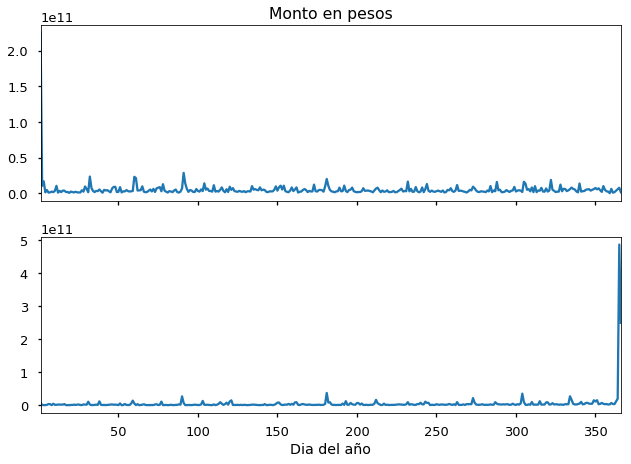

In [6]:
with plt.style.context('seaborn-talk'):
    fig, axs = plt.subplots(ncols=1, nrows=2, sharex=True)
    conteo_inicio.plot(ax=axs[0], title='Monto en pesos')
    conteo_fin.plot(ax=axs[1])

In [ ]:
df_test = df_validos.drop_duplicates(subset=['DEPENDENCIA', 'CLAVEUC'])
print(df_test.shape)
df_test = df_test.groupby('DEPENDENCIA').CLAVEUC.count().sort_values(ascending=False)

with plt.style.context('seaborn-talk'):
    df_test.head(30).sort_values().plot.barh()
    # plt.tight_layout()

In [ ]:
# df_validos.to_csv('../data/processed/procedimientos_2017_06_27.psv', sep='|', index=False, encoding='utf-8', quoting=1)

In [ ]:
# def convert_to_mxn(montos, monedas, fechas):
#     monto_pesos = []
#     for monto, moneda, fecha in zip(montos, monedas, fechas):
#         if moneda in {'MXN', 'TEST', 'OTH'}:
#             monto_pesos.append(monto)
#         else:
#             val = converter.convert(monto, moneda, 'MXN', date=fecha)
#             monto_pesos.append(val)
#     return monto_pesos

# # lectura y tirar repetidos
# df_procedimientos = feather.read_dataframe('../data/processed/procedimientos_2017_06_14.feather')


# print(df_procedimientos.shape)
# df_procedimientos = df_procedimientos.loc[df_procedimientos.GOBIERNO == 'APF', :]
# df_procedimientos = df_procedimientos.drop('GOBIERNO', axis=1)
# print(df_procedimientos.shape)

# dep_repetidas = {
#     'HOSPITAL GENERAL DE MEXICO "DR. EDUARDO LICEAGA"': 'HOSPITAL GENERAL DE MEXICO',
#     'INSTITUTO NACIONAL DE REHABILITACION LUIS GUILLERMO IBARRA IBARRA': 'INSTITUTO NACIONAL DE REHABILITACION',
#     'CENTRO DE INVESTIGACION EN GEOGRAFIA Y GEOMATICA, "ING. JORGE L. TAMAYO", A.C.': 'CENTRO DE INVESTIGACION EN GEOGRAFIA Y GEOMATICA "ING. JORGE L. TAMAYO", A.C.',
#     'TRIBUNAL FEDERAL DE JUSTICIA FISCAL Y ADMINISTRATIVA': 'TRIBUNAL FEDERAL DE JUSTICIA ADMINISTRATIVA',
#     'INSTITUTO DE INVESTIGACIONES ELECTRICAS': 'INSTITUTO NACIONAL DE ELECTRICIDAD Y ENERGIAS LIMPIAS'
# }

# for k, v in dep_repetidas.items():
#     df_procedimientos.loc[df_procedimientos.DEPENDENCIA == k, 'DEPENDENCIA'] = v

# del dep_repetidas

# cols_id = ['NUMERO_PROCEDIMIENTO', 'CODIGO_CONTRATO', 'CODIGO_EXPEDIENTE']
# df_validos = df_procedimientos.drop_duplicates(subset=cols_id, keep='first')
# print(df_validos.shape)


# # convertir a Pesos
# converter = CurrencyConverter(fallback_on_missing_rate=True)
# monto_en_pesos = convert_to_mxn(
#     df_validos.IMPORTE_CONTRATO.values, df_validos.MONEDA.values, df_validos.FECHA_INICIO)


# df_validos = df_validos.assign(IMPORTE_PESOS=monto_en_pesos)
# # df_validos = df_validos.drop('IMPORTE_CONTRATO', axis=1)

# def get_claveuc_proc(num_proc):
#     if num_proc is None:
#         return num_proc
#     return num_proc.split('-')[1]

# def get_claveuc_nombre(nombre_uc):
#     if nombre_uc is None:
#         return nombre_uc
#     nombre_uc =  nombre_uc.split('#')
#     if len(nombre_uc) > 1 and isinstance(nombre_uc, list):
#         return nombre_uc[1]
#     return None

# df_validos = df_validos.assign(CLAVEUC_PROC=df_validos.NUMERO_PROCEDIMIENTO.map(get_claveuc_proc))
# df_validos = df_validos.assign(CLAVEUC_NOM=df_validos.NOMBRE_DE_LA_UC.map(get_claveuc_nombre))

# del monto_en_pesos

# # Limpiar CLAVEUC
# df_validos.loc[df_validos.CLAVEUC.str.len() == 8, 'CLAVEUC'] = df_validos.CLAVEUC.str.pad(9, fillchar='0')
# df_validos.loc[df_validos.CLAVEUC.str.len() == 7, 'CLAVEUC'] = df_validos.CLAVEUC.str.pad(9, fillchar='0')



# # limpiar PoC
# df_validos.loc[:, 'PROVEEDOR_CONTRATISTA'] = df_validos.PROVEEDOR_CONTRATISTA.str.replace('.', '')
# df_validos.loc[:, 'PROVEEDOR_CONTRATISTA'] = df_validos.PROVEEDOR_CONTRATISTA.str.replace(',', '')
# df_validos.loc[:, 'PROVEEDOR_CONTRATISTA'] = df_validos.PROVEEDOR_CONTRATISTA.str.replace('"', '')
# df_validos.loc[:, 'PROVEEDOR_CONTRATISTA'] = df_validos.PROVEEDOR_CONTRATISTA.str.replace("'", '')

# unidades_directorio = pd.read_excel(
#     '../data/raw/Directorio Unidades Compradoras Gobierno Federal.xls',
#     dtype=str)
# unidades_directorio = set(
#     unidades_directorio.loc[:, 'Clave UC en CompraNet'].unique())


# def get_claveuc_real(df, unidades_validas):
#     cond1 = (df.CLAVEUC == df.CLAVEUC_PROC)
#     cond2 = (df.CLAVEUC == df.CLAVEUC_NOM)
#     cond3 = (df.CLAVEUC_NOM == df.CLAVEUC_PROC)
#     df_aux = df.assign(CLAVEUC_REAL='MISSING')
#     # Set the value of clave if at least one condition is met
#     df_aux.loc[cond1[cond1 == True].index, 'CLAVEUC_REAL'] = df_aux.loc[cond1[cond1 == True].index, 'CLAVEUC']
#     df_aux.loc[cond2[cond2 == True].index, 'CLAVEUC_REAL'] = df_aux.loc[cond2[cond2 == True].index, 'CLAVEUC']
#     df_aux.loc[cond3[cond3 == True].index, 'CLAVEUC_REAL'] = df_aux.loc[cond3[cond3 == True].index, 'CLAVEUC_PROC']
    
#     df_test = df_aux.loc[df_aux.CLAVEUC_REAL == 'MISSING']
#     cond_nom = df_test.CLAVEUC_NOM.map(lambda clave: clave in unidades_validas)
#     cond_proc = df_test.CLAVEUC_PROC.map(lambda clave: clave in unidades_validas)
#     cond_clave = df_test.CLAVEUC.map(lambda clave: clave in unidades_validas)
    
#     df_aux.loc[
#         cond_nom[cond_nom == True].index, 'CLAVEUC_REAL'
#     ] = df_aux.loc[cond_nom[cond_nom == True].index].CLAVEUC_NOM

#     df_aux.loc[
#         cond_proc[cond_proc == True].index, 'CLAVEUC_REAL'
#     ] = df_aux.loc[cond_proc[cond_proc == True].index].CLAVEUC_PROC

#     df_aux.loc[
#         cond_clave[cond_clave == True].index, 'CLAVEUC_REAL'
#     ] = df_aux.loc[cond_clave[cond_clave == True].index].CLAVEUC
    
#     return df_aux

# df_test = get_claveuc_real(df_validos, unidades_directorio)

# df_validos.head(3)

In [3]:
# unidades_validas = unidades_directorio
# df = df_validos

# cond1 = (df.CLAVEUC == df.CLAVEUC_PROC)
# cond2 = (df.CLAVEUC == df.CLAVEUC_NOM)
# cond3 = (df.CLAVEUC_NOM == df.CLAVEUC_PROC)
# df_aux = df.assign(CLAVEUC_REAL='MISSING')

# # Set the value of clave if at least one condition is met
# df_aux.loc[cond1[cond1 == True].index, 'CLAVEUC_REAL'] = df_aux.loc[cond1[cond1 == True].index, 'CLAVEUC']
# df_aux.loc[cond2[cond2 == True].index, 'CLAVEUC_REAL'] = df_aux.loc[cond2[cond2 == True].index, 'CLAVEUC']
# df_aux.loc[cond3[cond3 == True].index, 'CLAVEUC_REAL'] = df_aux.loc[cond3[cond3 == True].index, 'CLAVEUC_PROC']

# df_test = df_aux.loc[df_aux.CLAVEUC_REAL == 'MISSING']
# cond_nom = df_test.CLAVEUC_NOM.map(lambda clave: clave in unidades_validas)
# cond_proc = df_test.CLAVEUC_PROC.map(lambda clave: clave in unidades_validas)
# cond_clave = df_test.CLAVEUC.map(lambda clave: clave in unidades_validas)

# df_aux.loc[
#     cond_nom[cond_nom == True].index, 'CLAVEUC_REAL'
# ] = df_aux.loc[cond_nom[cond_nom == True].index].CLAVEUC_NOM

# df_aux.loc[
#     cond_proc[cond_proc == True].index, 'CLAVEUC_REAL'
# ] = df_aux.loc[cond_proc[cond_proc == True].index].CLAVEUC_PROC

# df_aux.loc[
#     cond_clave[cond_clave == True].index, 'CLAVEUC_REAL'
# ] = df_aux.loc[cond_clave[cond_clave == True].index].CLAVEUC